In [1]:
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split as tts
import time
import imageio
from IPython.display import HTML


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [3]:
np.random.seed(0)

# Data Generation

In [7]:
data,labels=make_blobs(1200,3,6,random_state=0)
print(data.shape,labels.shape)

(1200, 3) (1200,)


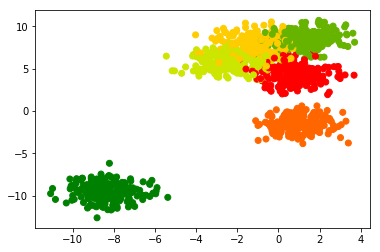

In [8]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

# Scalar multiclassification class

In [10]:
W1=np.random.randn(3,2)
W2=np.random.randn(2,1)
W3=np.random.randn(1,6)
print(W1,W2,W3)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]] [[ 0.95008842]
 [-0.15135721]] [[-0.10321885  0.4105985   0.14404357  1.45427351  0.76103773  0.12167502]]


In [26]:
class ffn_multi_scalar:
    
    def __init__(self,W1,W2,W3):
        self.w1 = W1[0][0].copy()
        self.w2 = W1[1][0].copy()
        self.w3 = W1[2][0].copy()
        self.w4 = W1[0][1].copy()
        self.w5 = W1[1][1].copy()
        self.w6 = W1[2][1].copy()
        self.w7 = W2[0][0].copy()
        self.w8 = W2[1][0].copy()
        self.w9 = W3[0][0].copy()
        self.w10 = W3[0][1].copy()
        self.w11 = W3[0][2].copy()
        self.w12 = W3[0][3].copy()
        self.w13 = W3[0][4].copy()
        self.w14 = W3[0][5].copy()
        self.b1=0
        self.b2=0
        self.b3=0
        self.b4=0
        self.b5=0
        self.b6=0
        self.b7=0
        self.b8=0
        self.b9=0
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
        
    def forward_pass(self,x):
        self.x1,self.x2,self.x3=x
            
        #First layer
        self.a1=self.w1 * self.x1 + self.w3 * self.x2 + self.w5 * self.x3 + self.b1
        self.a2=self.w2 * self.x1 + self.w4 * self.x2 + self.w6 * self.x3 + self.b2
        self.h1=self.sigmoid(self.a1)
        self.h2=self.sigmoid(self.a2)
            
        #Hidden Layers
        self.a3=self.w7 * self.h1 + self.w8 * self.h2 + self.b3
        self.h3=self.sigmoid(self.a3)
            
        self.a4=self.w9 * self.h3 + self.b4
        self.a5=self.w10 * self.h3 + self.b5
        self.a6=self.w11 * self.h3 + self.b6
        self.a7=self.w12 * self.h3 + self.b7
        self.a8=self.w13 * self.h3 + self.b8
        self.a9=self.w14 * self.h3 + self.b9
        exps = (np.exp(self.a4) + np.exp(self.a5) + np.exp(self.a6) + np.exp(self.a7)
                    + np.exp(self.a8) + np.exp(self.a9))
        self.h4 = np.exp(self.a4)/exps
        self.h5 = np.exp(self.a5)/exps
        self.h6 = np.exp(self.a6)/exps
        self.h7 = np.exp(self.a7)/exps
        self.h8 = np.exp(self.a8)/exps
        self.h9 = np.exp(self.a9)/exps
            
        return np.array([self.h4,self.h5,self.h6,self.h7,self.h8,self.h9])
        
    def grad(self,x,y):
        self.forward_pass(x)
        self.y1,self.y2,self.y3,self.y4,self.y5,self.y6=y
            
        self.dw9 = (self.h4 - self.y1) * self.h3
        self.db4 = (self.h4 - self.y1)
            
        self.dw10 = (self.h5 - self.y2) * self.h3
        self.db5 = (self.h5 - self.y2)
            
        self.dw11 = (self.h6 - self.y3) * self.h3
        self.db6 = (self.h6 - self.y3)
            
        self.dw12 = (self.h7 - self.y4) * self.h3
        self.db7= (self.h7 - self.y4)
            
        self.dw13 = (self.h8 - self.y5) * self.h3
        self.db8 = (self.h8 - self.y5)
            
        self.dw14 = (self.h9 - self.y6) * self.h3
        self.db9 = (self.h9 - self.y6)
            
        self.dh3= ((self.h4 - self.y1) * self.w9 + (self.h5 - self.y2) * self.w10 +
                      (self.h6 - self.y3) * self.w11 + (self.h7 - self.y4) * self.w12 +
                      (self.h8 - self.y5) * self.w13 + (self.h9 - self.y6) * self.w14)
            
        self.dw7= self.dh3 * self.h3*(1-self.h3) * self.h1
        self.dw8= self.dh3 * self.h3*(1-self.h3) * self.h2
        self.db3= self.dh3 * self.h3*(1-self.h3)
            
        self.dh1 = self.dh3 * self.h3*(1-self.h3) * self.w7
        self.dh2 = self.dh3 * self.h3*(1-self.h3) * self.w8
            
        self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
        self.dw2 = self.dh2 * self.h2*(1-self.h2) * self.x1
        self.dw3 = self.dh1 * self.h1*(1-self.h1) * self.x2
        self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
        self.dw5 = self.dh1 * self.h1*(1-self.h1) * self.x3
        self.dw6 = self.dh2 * self.h2*(1-self.h2) * self.x3
        self.db1 = self.dh1 * self.h1*(1-self.h1)
        self.db2 = self.dh2 * self.h2*(1-self.h2)
            
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
        
    def fit(self,X,Y,epoch=100,lr=1,init=False,display_loss=True):
            
        if init:
            self.w1 = W1[0][0].copy()
            self.w2 = W1[1][0].copy()
            self.w3 = W1[2][0].copy()
            self.w4 = W1[0][1].copy()
            self.w5 = W1[1][1].copy()
            self.w6 = W1[2][1].copy()
            self.w7 = W2[0][0].copy()
            self.w8 = W2[1][0].copy()
            self.w9 = W3[0][0].copy()
            self.w10 = W3[0][1].copy()
            self.w11 = W3[0][2].copy()
            self.w12 = W3[0][3].copy()
            self.w13 = W3[0][4].copy()
            self.w14 = W3[0][5].copy()
            self.b1=0
            self.b2=0
            self.b3=0
            self.b4=0
            self.b5=0
            self.b6=0
            self.b7=0
            self.b8=0
            self.b9=0
                
        if display_loss:
            loss={}
                
        for i in tqdm_notebook(range(epoch),unit="epoch"):
            dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10,dw11,dw12,dw13,dw14=[0]*14
            db1,db2,db3,db4,db5,db6,db7,db8,db9=[0]*9
            for x,y in zip(X,Y):
                self.grad(x,y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                dw7 += self.dw7
                dw8 += self.dw8
                dw9 += self.dw9
                dw10 += self.dw10
                dw11 += self.dw11
                dw12 += self.dw12
                dw13 += self.dw13
                dw14 += self.dw14
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                db4 += self.db4
                db5 += self.db5
                db6 += self.db6
                db7 += self.db7
                db8 += self.db8
                db9 += self.db9
                
            m=X.shape[0]
            self.w1 -= lr * dw1/m
            self.w2 -= lr * dw2/m
            self.w3 -= lr * dw3/m
            self.w4 -= lr * dw4/m
            self.w5 -= lr * dw5/m
            self.w6 -= lr * dw6/m
            self.w7 -= lr * dw7/m
            self.w8 -= lr * dw8/m
            self.w9 -= lr * dw9/m
            self.w10 -= lr * dw10/m
            self.w11 -= lr * dw11/m
            self.w12 -= lr * dw12/m
            self.w13 -= lr * dw13/m
            self.w14 -= lr * dw14/m
            self.b1-= lr * db1/m
            self.b2-= lr * db2/m
            self.b3-= lr * db3/m
            self.b4-= lr * db4/m
            self.b5-= lr * db5/m
            self.b6-= lr * db6/m
            self.b7-= lr * db7/m
            self.b8-= lr * db8/m
            self.b9-= lr * db9/m
                
            if display_loss:
                y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y,1),y_pred)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epoch")
            plt.ylabel("log_loss")
            plt.show()
            

# Making  training and testing datasets

In [12]:
X_train,X_val,Y_train,Y_val= tts(data,labels,stratify=labels,random_state=0)

In [13]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(900, 3) (300, 3) (900,) (300,)


In [14]:
enc=OneHotEncoder()

In [15]:
Y_train_oh = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_train_oh.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(900, 6)

In [35]:
ffn_scalar=ffn_multi_scalar(W1,W2,W3)

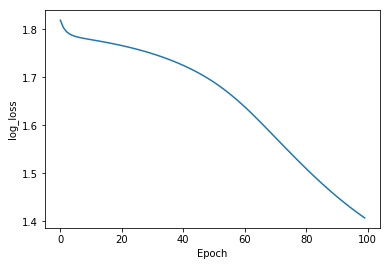

In [36]:
ffn_scalar.fit(X_train,Y_train_oh)

# Vector Multiclass classification

In [70]:
class ffn_multi_vector:
    
    def __init__(self,W1,W2,W3):
        self.W1=W1.copy() #(3,2)
        self.W2=W2.copy() #(2,1)
        self.W3=W3.copy() #(1,6)
        self.B1=np.zeros((1,2))
        self.B2=np.zeros((1,1))
        self.B3=np.zeros((1,6))
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def softmax(self,x):
        exps = np.exp(x)
        return exps/np.sum(exps)
        
    def forward_pass(self,x):
        #self.x1,self.x2,self.x3=x
        x=x.reshape(1,-1) #(1,3)
        #print(x.shape,self.W1.shape,self.B1.shape)    
        self.A1=np.matmul(x,self.W1) + self.B1 # (1,3) * (3,2) -> (1,2) + (1,2) -> (1,2)
        self.H1=self.sigmoid(self.A1)
        
        self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (1,2) * (2,1) -> (1,1) + (1,1) -> (1,1)
        self.H2 = self.sigmoid(self.A2)
        
        self.A3 = np.matmul(self.H2,self.W3) + self.B3 #(1,1)*(1,6) -> (1,6) + (1,6) -> (1,6)
        
        self.H3=self.softmax(self.A3)
            
        return self.H3
    
    def grad_sigmoid(self,x):
        return x*(1-x)
        
    def grad(self,x,y):
        self.forward_pass(x)
        #self.y1,self.y2,self.y3,self.y4,self.y5,self.y6=y
        x=x.reshape(1,-1)#(1,3)
        y=y.reshape(1,-1)#(1,6)
        
        
        self.dA3 = (self.H3-y) #(1,6)
        self.dW3 = np.matmul(self.H2.T,self.dA3) #(1,1) * (1,6) -> (1,6)
        self.dB3 = self.dA3
        
        self.dH2= np.matmul(self.dA3,self.W3.T) #(1,6) * (6,1) -> (1,1)
        self.dA2= np.multiply(self.dH2,self.grad_sigmoid(self.H2)) #(1,1)
        self.dW2= np.matmul(self.H1.T,self.dA2)#(2,1) *(1,1) -> (2,1)
        self.dB2 = self.dA2
            
        self.dH1 = np.matmul(self.dA2,self.W2.T) #(1,1) * (1,2) -> (1,2)
        self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))# (1,2) 
        self.dW1= np.matmul(x.T,self.dA1) #(3,1) * (1,2) -> (3,2)
        self.dB1= self.dA1
        
            
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()
    def predict1(self,X):
        Y_pred = []
        for x in X:
            y_pred=self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
        
    def fit(self,X,Y,epoch=100,lr=1,init=False,display_loss=True):
            
        if init:
            self.W1=W1.copy() #(3,2)
            self.W2=W2.copy() #(2,1)
            self.W3=W3.copy() #(1,6)
            self.B1=np.zeros((1,2))
            self.B2=np.zeros((1,1))
            self.B3=np.zeros((1,6))
                
        if display_loss:
            loss={}
                
        for i in tqdm_notebook(range(epoch),unit="epoch"):
            dW1,dW2,dW3=np.zeros((3,2)),np.zeros((2,1)),np.zeros((1,6))
            dB1,dB2,dB3=np.zeros((1,2)),np.zeros((1,1)),np.zeros((1,6))
            for x,y in zip(X,Y):
                self.grad(x,y)
                dW1 += self.dW1
                dW2 += self.dW2
                dW3 += self.dW3
                dB1 += self.dB1
                dB2 += self.dB2
                dB3 += self.dB3
                
            m=X.shape[0]
            self.W1 -= lr * dW1/m
            self.W2 -= lr * dW2/m
            self.W3 -= lr * dW3/m
            self.B1-= lr * dB1/m
            self.B2-= lr * dB2/m
            self.B3-= lr * dB3/m
                
            if display_loss:
                y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y,1),y_pred)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epoch")
            plt.ylabel("log_loss")
            plt.show()
            

In [71]:
ffn_vector=ffn_multi_vector(W1,W2,W3)

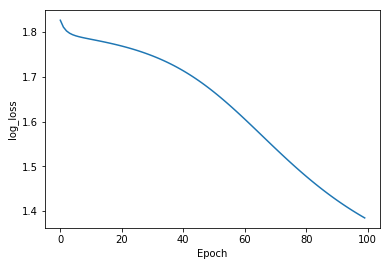

In [72]:
ffn_vector.fit(X_train,Y_train_oh)

# making input also as vectors



In [85]:
class ffn_multi_vector_input:
    
    def __init__(self,W1,W2,W3):
        self.W1=W1.copy() #(3,2)
        self.W2=W2.copy() #(2,1)
        self.W3=W3.copy() #(1,6)
        self.B1=np.zeros((1,2))
        self.B2=np.zeros((1,1))
        self.B3=np.zeros((1,6))
        
    def sigmoid(self,X):
        return 1.0/(1.0 + np.exp(-X))
    
    def softmax(self,X):
        exps = np.exp(X)
        return exps/np.sum(exps,1).reshape(-1,1)
        
    def forward_pass(self,X):
        #self.x1,self.x2,self.x3=x
        #x=x.reshape(1,-1) #(1,3)
        #print(x.shape,self.W1.shape,self.B1.shape)    
        self.A1=np.matmul(X,self.W1) + self.B1 # (1,3) * (3,2) -> (1,2) + (1,2) -> (1,2)
        self.H1=self.sigmoid(self.A1)
        
        self.A2 = np.matmul(self.H1,self.W2) + self.B2 # (1,2) * (2,1) -> (1,1) + (1,1) -> (1,1)
        self.H2 = self.sigmoid(self.A2)
        
        self.A3 = np.matmul(self.H2,self.W3) + self.B3 #(1,1)*(1,6) -> (1,6) + (1,6) -> (1,6)
        
        self.H3=self.softmax(self.A3)
            
        return self.H3
    
    def grad_sigmoid(self,X):
        return X*(1-X)
        
    def grad(self,X,Y):
        self.forward_pass(X)
        #self.y1,self.y2,self.y3,self.y4,self.y5,self.y6=y
        #x=x.reshape(1,-1)#(1,3)
        #y=y.reshape(1,-1)#(1,6)
        
        
        self.dA3 = (self.H3-Y) #(N,6)
        self.dW3 = np.matmul(self.H2.T,self.dA3) #(1,1) * (1,6) -> (1,6)
        self.dB3 = np.sum(self.dA3,0).reshape(1,-1)
        
        self.dH2= np.matmul(self.dA3,self.W3.T) #(1,6) * (6,1) -> (1,1)
        self.dA2= np.multiply(self.dH2,self.grad_sigmoid(self.H2)) #(1,1)
        self.dW2= np.matmul(self.H1.T,self.dA2)#(2,1) *(1,1) -> (2,1)
        self.dB2 = np.sum(self.dA2,0).reshape(1,-1)
            
        self.dH1 = np.matmul(self.dA2,self.W2.T) #(1,1) * (1,2) -> (1,2)
        self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))# (1,2) 
        self.dW1= np.matmul(X.T,self.dA1) #(3,1) * (1,2) -> (3,2)
        self.dB1= np.sum(self.dA1,0).reshape(1,-1)
        
            
    def predict(self,X):
        Y_pred = self.forward_pass(X)
        return np.array(Y_pred).squeeze()
    
    
    def fit(self,X,Y,epoch=100,lr=1,init=False,display_loss=True):
            
        if init:
            self.W1=W1.copy() #(3,2)
            self.W2=W2.copy() #(2,1)
            self.W3=W3.copy() #(1,6)
            self.B1=np.zeros((1,2))
            self.B2=np.zeros((1,1))
            self.B3=np.zeros((1,6))
                
        if display_loss:
            loss={}
                
        for i in tqdm_notebook(range(epoch),unit="epoch"):
            self.grad(X,Y)
                
            m=X.shape[0]
            self.W1 -= lr * self.dW1/m
            self.W2 -= lr * self.dW2/m
            self.W3 -= lr * self.dW3/m
            self.B1-= lr * self.dB1/m
            self.B2-= lr * self.dB2/m
            self.B3-= lr * self.dB3/m
                
            if display_loss:
                y_pred = self.predict(X)
                loss[i] = log_loss(np.argmax(Y,1),y_pred)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epoch")
            plt.ylabel("log_loss")
            plt.show()
            

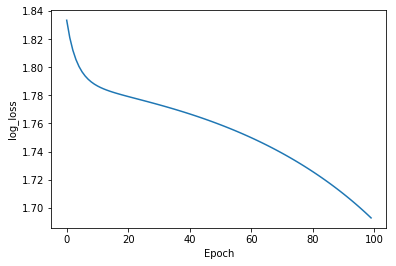

Time taken by model 1: 12.108066082000732


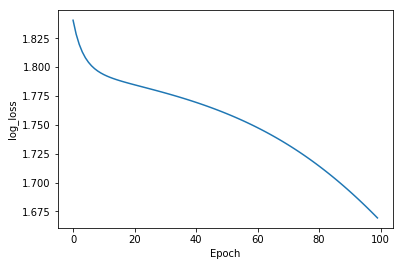

Time taken by model 2: 10.460000038146973


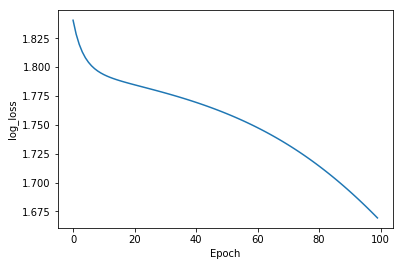

Time taken by model 3: 0.6826105117797852


In [86]:
models_init =[ ffn_multi_scalar(W1, W2,W3), ffn_multi_vector(W1, W2,W3),ffn_multi_vector_input(W1, W2,W3)]
models = []
for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train,Y_train_oh,epoch=100,lr=.5,display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by model {}: {}".format(idx, toc-tic))

In [90]:
ffn_vec_inp=ffn_multi_vector_input(W1,W2,W3)

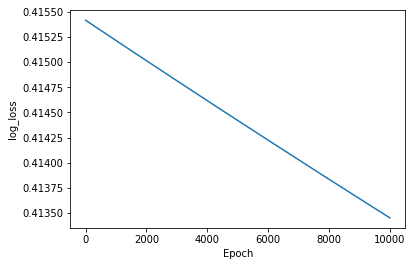

In [231]:
ffn_vec_inp.fit(X_train,Y_train_oh,10000,.005)

In [232]:
y_pred=ffn_vec_inp.predict(X_train)
y_pred=np.argmax(y_pred,1)
accuracy=accuracy_score(y_pred,Y_train)
y_pred_val=ffn_vec_inp.predict(X_val)
y_pred_val=np.argmax(y_pred_val,1)
acc_val=accuracy_score(y_pred_val,Y_val)
print("Training Accuracy",accuracy)
print("Validation Accuracy",acc_val)

Training Accuracy 0.8888888888888888
Validation Accuracy 0.9066666666666666


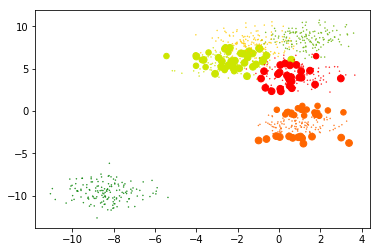

In [222]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap,s=15*(np.abs(Y_train-y_pred)) + .2)
plt.show()